# 2-D Exploratory Data Analysis

In this notebook we will pick ONE variable you're interested in understanding from your non-census data and plot it against various census variables in scatterplots or dotplots.

### Standard Python and R imports

In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


## Load the data

In [9]:
%%R
 library(readxl)
# Import data with R
df <- read_excel('merged.xlsx')
df

# A tibble: 1,842 × 17
   Name        Location `Open Year-Round` `Handicap Accessible` Borough Comments
   <chr>       <chr>    <chr>             <chr>                 <chr>   <chr>   
 1 100% Playg… Glenwoo… Yes               <NA>                  Brookl… <NA>    
 2 100% Playg… Glenwoo… Yes               <NA>                  Brookl… <NA>    
 3 100% Playg… Glenwoo… Yes               <NA>                  Brookl… <NA>    
 4 174th Stre… East 17… Yes               <NA>                  Bronx   <NA>    
 5 174th Stre… East 17… Yes               <NA>                  Bronx   <NA>    
 6 174th Stre… East 17… Yes               <NA>                  Bronx   <NA>    
 7 227 Street… Bronx B… Yes               Yes                   Bronx   <NA>    
 8 227 Street… Bronx B… Yes               Yes                   Bronx   <NA>    
 9 227 Street… Bronx B… Yes               Yes                   Bronx   <NA>    
10 Rienzi Pla… East 22… Yes               <NA>                  Bronx   <NA>    
# ℹ 1

# Exploratory data analysis



## 2-D visualizations (aka scatter plots)

It seems simple. It's not simple. mainly because...

**CORRELATION =/= CAUSATION**

Comparing variables to one another can be TRICKY!

Let's make some 2-D visualizations (aka scatter plots).

Be VERY careful how you phrase the headlines. Take time to think through what you want to say.




In [12]:
%%R
library(ggplot2)
library(readr)
library(dplyr)


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 51 rows containing non-finite values (`stat_boxplot()`). 

R[write to console]: 2: Removed 51 rows containing missing values (`geom_point()`). 



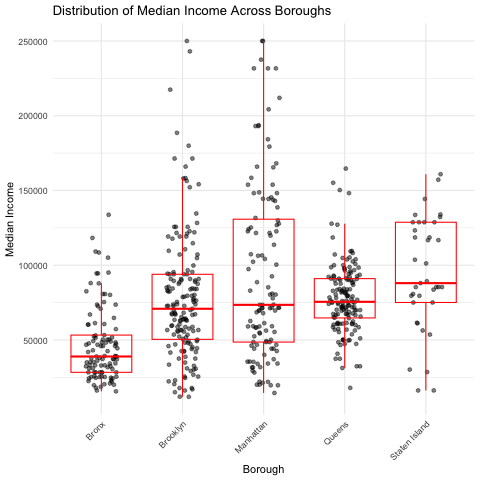

In [13]:
%%R 

df_filtered <- df %>%
  filter(variable == "med_inc") %>%
  mutate(Borough = factor(Borough)) 


ggplot(df_filtered, aes(x = Borough, y = estimate)) +
  geom_jitter(alpha = 0.5, width = 0.2) +  
  geom_boxplot(fill = NA, outlier.shape = NA, color = "red") +
  labs(x = "Borough", y = "Median Income", title = "Distribution of Median Income Across Boroughs") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) 


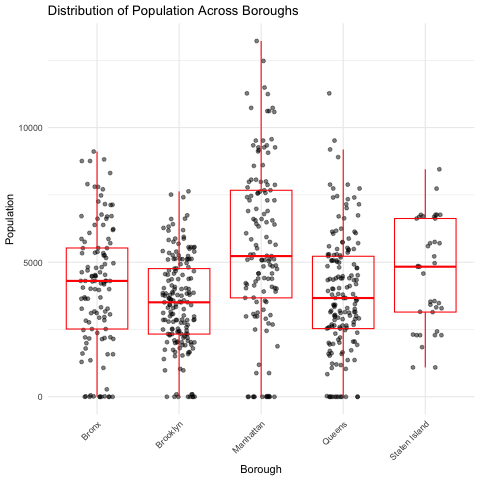

In [14]:
%%R

library(ggplot2)
library(dplyr)

df_population <- df %>%
  filter(variable == "population") %>%
  mutate(Borough = factor(Borough))  

ggplot(df_population, aes(x = Borough, y = estimate)) +
  geom_jitter(alpha = 0.5, width = 0.2) + 
  geom_boxplot(fill = NA, outlier.shape = NA, color = "red") +
  labs(x = "Borough", y = "Population", title = "Distribution of Population Across Boroughs") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  
